### CAMELYON17 Dataset Evaluation
This notebook covers the results using the CAMELYON17 dataset. This dataset includes image patches obtained from patients in multiple hospitals. The patches from different hospitals are used to evaluate the domain generalisation of the baseline CNN model compared to the CNN models trained with augmented data. First, the required libraries are loaded in. 

In [72]:
# Standard libraries
import matplotlib.pyplot as plt
import numpy as np

# Keras functions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import backend

# ROC curve analysis
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

The `metadata.csv` file contains all the necessary information about the patches. The columns of this file contain: `index`, `patient number`, `node number`, `x-coordinate` w.r.t. the full WSI, `y-coordinate` w.r.t. the full WSI, `label`, `slide number`, `hospital` and `split number`. The metadata is split into the training and testing set based on the `split number`, where 0 is the training set and 1 the testing set. The columns of this csv file can be used later to easily get access to the correct folders, where the patches are saved.

In [56]:
metadata = np.genfromtxt("metadata.csv", dtype=int, delimiter=",", skip_header=1)
splitted_metadata = np.split(metadata, np.where(np.diff(metadata[:,8]))[0]+1)

training_metadata = splitted_metadata[0]
testing_metadata = splitted_metadata[1]
for index in range(2, len(splitted_metadata)):
    if index%2 == 0:
        training_metadata = np.vstack((training_metadata, splitted_metadata[index]))
    else:
        testing_metadata = np.vstack((testing_metadata, splitted_metadata[index]))

A function `validation` is defined to perform the evaluation on the testing set. This can easily be done for different CNN models and different hospitals by changing the input arguments.

In [86]:
def validation(testing_metadata, model_filepath, hospital_nr):
    """
    Arguments:
    testing_metadata:   an array containing the metadata of the testing set with the following columns:
                        index, patient nr, node nr, x-coordinate, y-coordinate, label, slide nr, split nr
    model_filepath:     filepath of the CNN model used to predict the patches.
    hospital:           int number indicating the hospital (0,1,2,3,4)
    """
    model = load_model(model_filepath)

    true_labels = []
    pred_labels = []
    for i in range(len(testing_metadata)):
        if testing_metadata[i,7] == hospital_nr:
            patient_nr = testing_metadata[i,1]
            node_nr = testing_metadata[i,2]
            x_coord = testing_metadata[i,3]
            y_coord = testing_metadata[i,4]
            
            if patient_nr < 10:
                patch_path = f"patches/patient_00{patient_nr}_node_{node_nr}/patch_patient_00{patient_nr}_node_{node_nr}_x_{x_coord}_y_{y_coord}.png"
            else:
                patch_path = f"patches/patient_0{patient_nr}_node_{node_nr}/patch_patient_0{patient_nr}_node_{node_nr}_x_{x_coord}_y_{y_coord}.png"

            img = img_to_array(load_img(patch_path, target_size=(96,96)))
            img = np.array([img])
            
            pred_label = model.predict(img/255, verbose=None)
            pred_labels.append(pred_label[0][0])

            true_label = testing_metadata[i,5]
            true_labels.append(true_label)

            backend.clear_session()

            print(f"Progress: {i}/{len(testing_metadata)}")

    return true_labels, pred_labels

In [87]:
# Defining model name and paths
model_name = "cnn_augmentation_025"
model_filepath = f"../main project/trained_models/{model_name}.tf"

# Calling validation function
true_labels, pred_labels = validation(testing_metadata, model_filepath, 0)

Progress: 0/45595
Progress: 1/45595
Progress: 2/45595
Progress: 3/45595
Progress: 4/45595
Progress: 5/45595
Progress: 6/45595
Progress: 7/45595
Progress: 8/45595
Progress: 9/45595
Progress: 10/45595
Progress: 11/45595
Progress: 12/45595
Progress: 13/45595
Progress: 14/45595
Progress: 15/45595
Progress: 16/45595
Progress: 17/45595
Progress: 18/45595
Progress: 19/45595
Progress: 20/45595
Progress: 21/45595
Progress: 22/45595
Progress: 23/45595
Progress: 24/45595
Progress: 25/45595
Progress: 26/45595
Progress: 27/45595
Progress: 28/45595
Progress: 29/45595
Progress: 30/45595
Progress: 31/45595
Progress: 32/45595
Progress: 33/45595
Progress: 34/45595
Progress: 35/45595
Progress: 36/45595
Progress: 37/45595
Progress: 38/45595
Progress: 39/45595
Progress: 40/45595
Progress: 41/45595
Progress: 42/45595
Progress: 43/45595
Progress: 44/45595
Progress: 45/45595
Progress: 46/45595
Progress: 47/45595
Progress: 48/45595
Progress: 49/45595
Progress: 50/45595
Progress: 51/45595
Progress: 52/45595
Pro

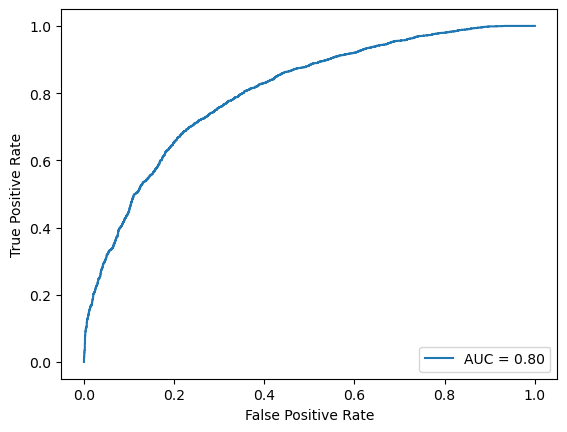

In [88]:
# Calculating false positive rate (fpr), true positive rate (tpr) and AUC
fpr, tpr, thresholds = roc_curve(true_labels, pred_labels)
roc_auc = auc(fpr, tpr)

# Generate ROC curve
roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc.plot();